# MCS 275 Spring 2023 Homework 9 Solutions

* Course Instructor: Emily Dumas
* Contributors to this document: Kylash Viswanathan

## Instructions:

* Complete the problems below, which ask you to write Python scripts.
* Upload your python code directly to gradescope, i.e. upload the `.py` files containing your work.

### Deadline
This homework assignment must be submitted in Gradescope by **Noon central time on Tuesday March 14, 2023**.

### Collaboration

**Collaboration is prohibited**, and you may only access resources (books, online, etc.) listed below.

### Content

This homework is about two of the topics we covered last week:
* JSON
* Bitmap images using Pillow

## Resources you may consult

Most relevant:    
* [Worksheet 8 Solutions](https://www.dumas.io/teaching/2023/spring/mcs275/nbview/worksheets/worksheet8soln.html)
* [Lecture 19 - set and defaultdict](http://dumas.io/teaching/2023/spring/mcs275/slides/lecture19.html)
* [Lecture 20 - CSV and JSON](http://dumas.io/teaching/2023/spring/mcs275/slides/lecture20.html)
* [Lecture 21 - Pillow](http://dumas.io/teaching/2023/spring/mcs275/slides/lecture21.html)
* [Pillow documentation](https://pillow.readthedocs.io/en/stable/)
* [Course sample code repo](https://github.com/emilydumas/mcs275spring2023/tree/main/samplecode)
* [Downey's book](https://greenteapress.com/thinkpython2/html/)
* MCS 260 course materials from Fall 2021:
    * [Slides, homework, worksheets, and projects](https://www.dumas.io/teaching/2021/fall/mcs260/)
    * [Sample programs](https://github.com/emilydumas/mcs260fall2021/tree/main/samplecode)

Less likely to be relevant, but also allowed:
* Any other lecture of MCS 275 spring 2023.
* [Python tour](https://www.dumas.io/teaching/2023/spring/mcs275/nbview/samplecode/python_tour.html)
* Slides from any lecture of my most recent MCS 260 course [MCS 260, Fall 2021](https://www.dumas.io/teaching/2021/fall/mcs260/).
* Any lecture video posted on our [course Blackboard site](https://uic.blackboard.com/ultra/courses/_247708_1/cl/outline)
* [Downey's book](https://greenteapress.com/thinkpython2/html/)
* Any other textbook listed on the course blackboard site under "Textbooks"

### Point distribution

This homework assignment has 2 problems, numbered 2 and 3.  The grading breakdown is:

| Points | Item |
| --- | --- |
| 3 | Autograder |
| 6 | Problem 2 |
| 6 | Problem 3 |
| **15** | Total |

The part marked "autograder" reflects points assigned to your submission based on some simple automated checks for Python syntax, etc.  The result of these checks is shown immediately after you submit.

### What to do if you're stuck

Ask your instructor or TA a question by email, in office hours, or on discord.

## Problem 2: When the fall begins and ends

Put your solution to this problem in a file `hwk9prob2.py`.

Here is a JSON file containing information about UIC's academic calendar, as it appeared on UIC's web site in August of 2020.

* [uic_caldata_2020.json](data/uic_caldata_2020.json)

Download it and save it in the place where you work on this homework.

Specifically, the file contains data about these years:
* 2019
* 2020
* 2021
* 2022
* 2023

And in most of those years, it contains data about these terms of study:
* spring
* summer1 (the shorter summer session)
* summer2 (the longer summer session)
* fall
(Spring 2019 and fall 2023 are not present in this dataset.)

For each term, the file contains information about the start date, end date, holidays, etc.

**Write a Python program that reads this file (using the `json` module) and lists the start and end date of every Fall semester for which information is available in the file.**

Rather than hard-coding the specific years present in this file in your program, try to make a program that do the same thing for any `json` file in the same format as this one, e.g.~one generated more recently which contains 2023-2027.

The expected output for this JSON file is:
```text
Fall 2019: 2019-08-26 to 2019-12-06
Fall 2020: 2020-08-24 to 2020-12-04
Fall 2021: 2021-08-23 to 2021-12-03
Fall 2022: 2022-08-22 to 2022-12-02
```

**Note:** Most of the work for this problem lies in understanding the structure of the data inside the JSON file.  I recommend exploring it in a Python notebook so you can find the information you need, then write a program to extract that information systematically.

# Solution

In [ ]:
"""
Prints the Fall semester UIC dates of instruction from a JSON file containing information about UIC's 
academic calendar to the console
"""

import json

with open("uic_caldata_2020.json", "r", encoding="UTF-8") as file:
    cal_data = json.load(file)
    for year in cal_data:  # The keys are the years
        if "fall" in cal_data[year]: # Checks if a year has a fall semester
            print("Fall {}: {} to {}".format(year, cal_data[year]["fall"]["start"], cal_data[year]["fall"]["end"]))

## Problem 3: Stripe maker

Put your solution to this problem in a file `hwk9prob3.py`.

Using Pillow (module `PIL`), write a function `stripe_maker` that will create a bitmap image file of a specified name with colored stripes.  The function definition should be:

In [ ]:
def stripe_maker(
    fn,
    size=(300, 200),
    orientation="diagonal",
    colors=[(255,255,255),(0,0,0)],
    stripe_thickness=10,
):
    """
    Create an image whose dimensions are given by tuple `size`, filled with stripes.
    The stripes cycle between the colors in the list `colors`, in order, repeating
    until the image is filled.  The orientation of the stripes is controller by
    argument `orientation`, which can have values:
    * "horizontal" - The stripes are horizontal, with height `stripe_thickness` pixels
    * "vertical" - The stripes are vertical, with width `stripe_thickness` pixels
    * "diagonal" - The stripes are diagonal, going from lower left to upper right at an
       angle of 45 degrees.  The width and height of any stripe (which are equal due to
       the 45 degree angle) is `stripe_thickness` pixels.

    The resulting image is then saved to a bitmap image file whose name is given by
    argument `fn`.
    """

The docstring above explains what the function should do.

Here's a few samples of what the resulting image files should look like, for various combinations of arguments.

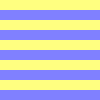

In [29]:
stripe_maker(
    fn="sample1.png",
    size=(100,100),
    orientation="horizontal",
    colors=[(255,255,128),(128,128,255)]
)
# Now let's see what was created
img = Image.open("sample1.png")
img

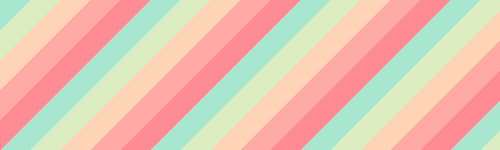

In [30]:
# Note that more than two colors are supported!
stripe_maker(
    fn="sample2.png",
    size=(500,150),
    orientation="diagonal",
    colors=[(168, 230, 207),
            (220, 237, 193),
            (255, 211, 182),
            (255, 170, 165),
            (255, 139, 148)],
    stripe_thickness=30
)
# Now let's see what was created
img = Image.open("sample2.png")
img

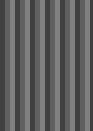

In [31]:
stripe_maker(
    fn="sample3.png",
    size=(93,131),
    orientation="vertical",
    colors=[(64,64,64),(96,96,96),(128,128,128)],
    stripe_thickness=5
)
# Now let's see what was created
img = Image.open("sample3.png")
img

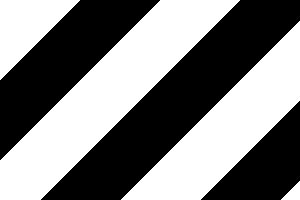

In [41]:
stripe_maker(fn="sample4.png",stripe_thickness=80) # use mostly default arguments
# Now let's see what was created
img = Image.open("sample4.png")
img

## Solution

In [ ]:
from PIL import Image
def stripe_maker(
    fn,
    size=(300, 200),
    orientation="diagonal",
    colors=[(255,255,255),(0,0,0)],
    stripe_thickness=10,
):
    """
    Creates an image whose dimensions are given by tuple `size`, filled with stripes.
    The stripes cycle between the colors in the list `colors`, in order, repeating
    until the image is filled.  The orientation of the stripes is controller by
    argument `orientation`, which can have values:
    * "horizontal" - The stripes are horizontal, with height `stripe_thickness` pixels
    * "vertical" - The stripes are vertical, with width `stripe_thickness` pixels
    * "diagonal" - The stripes are diagonal, going from lower left to upper right at an
       angle of 45 degrees.  The width and height of any stripe (which are equal due to
       the 45 degree angle) is `stripe_thickness` pixels.

    The resulting image is then saved to a bitmap image file whose name is given by
    argument `fn`.
    """
    stripes = Image.new("RGB",size)
    # Initializes an "RBG" image.

    n_colors = len(colors) # number of colors to cycle thru.
    

    for x in range(size[0]):
        #inserts the appropriate pixel content based on the desired orientation
        for y in range(size[1]):

            if orientation == "vertical":
                index = (x // stripe_thickness) % n_colors
            elif orientation == "horizontal":
                index = (y // stripe_thickness) % n_colors
            elif orientation == "diagonal":
                index = ((x+y) // stripe_thickness) % n_colors
            else:
                raise ValueError("Unknown orientation '{}'".format(orientation))
                
            stripes.putpixel((x,y), colors[index])
            
        stripes.save(fn)

### Revision history

* 2023-03-10 Initial publication